                                                             Anomaly Detection in Credit Card Fraud 

In [1]:
# Import the necessary libraries for the project

import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np     # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read the data which should be placed in the Desktop and the name of the file is 'creditcard.csv'

df = pd.read_csv('creditcard.csv')

In [3]:
# The first five lines from out dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# The original shape of the dataset

df.shape

(284807, 31)

In [5]:
# The names of the columns of the dataset

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# The mathematicial description of our dataset

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# More information about our data for example tha type of it's column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Checking if there are any missing data in our dataset, luckily there is none

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Determine number of fraud cases in the dataset
# Valid transaction if Class = 0 and Fraud if Class = 1


valid = len(df[df['Class'] == 0])
fraud = len(df[df['Class'] == 1])

Outlier_Fraction = (fraud/(valid+fraud)) * 100

print('The outlier fraction is :' , Outlier_Fraction) 
print('The valid transactions are :'  , valid ) 
print('The fraud transactions are :'  , fraud )

The outlier fraction is : 0.1727485630620034
The valid transactions are : 284315
The fraud transactions are : 492


In [10]:
# Information about the valid transactions only

print('Amount details of valid transaction')

valid_info= df[(df['Class']==0)]
valid_info.Amount.describe()

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# Information about the fraud transactions only

print('Amount details of fraud transaction')

fraud_info = df[df['Class'] ==1]
fraud_info.Amount.describe()

Amount details of fraud transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Note: Notice how imbalanced is our original dataset. 
Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. 
But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!



Text(0, 0.5, 'Frequency')

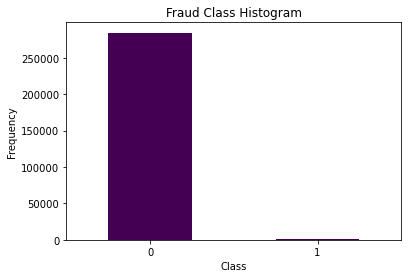

In [12]:
# Checking for the fraud and valid trasactions in a graph for better understanding

count_classes = pd.value_counts(df['Class'], sort = True ).sort_index()
count_classes.plot(kind = 'bar' ,rot = 0 ,colormap ='viridis')

plt.title ( "Fraud Class Histogram" )
plt.xlabel( "Class" )
plt.ylabel( "Frequency" )

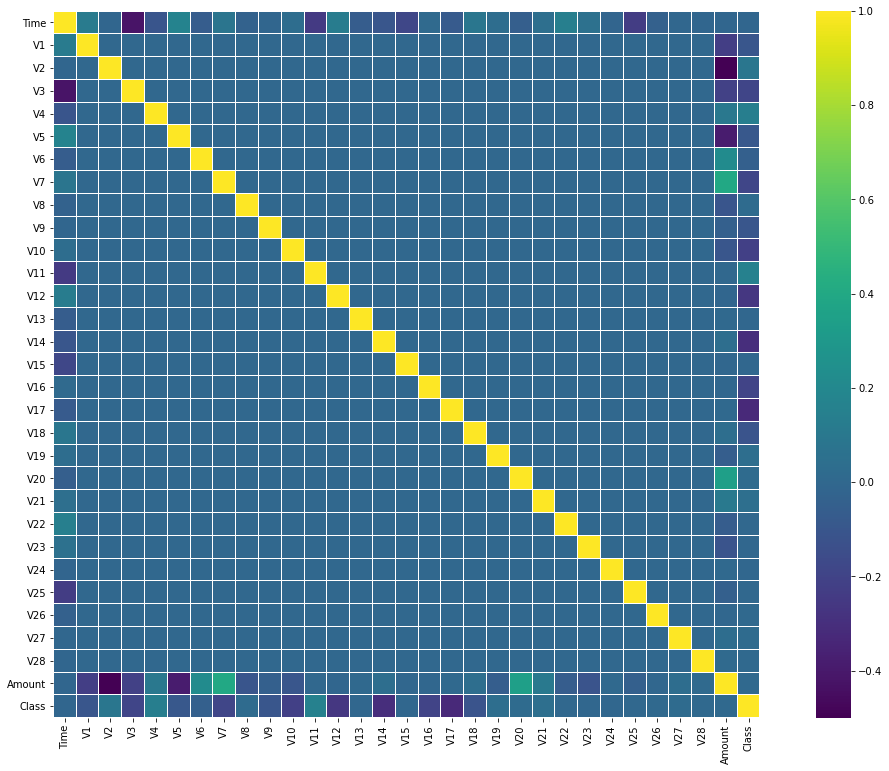

In [13]:
# Correlation matrix of the original dataset, we will not use this in order to find our outliers
# We use it only for a quick view and understanding the original dataset

corrmat = df.corr() 
fig = plt.figure(figsize = (20, 13)) 
sns.heatmap(corrmat, cmap='viridis', vmax = 1, vmin=-0.5 , square = True , linewidths= 0.05)
plt.show() 

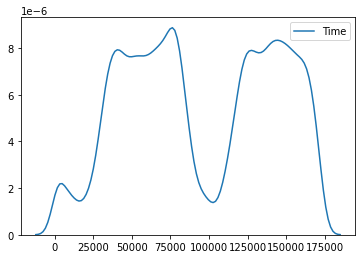

In [14]:
# Distribution of our dataset in Time

sns.kdeplot(df['Time'])
plt.show()

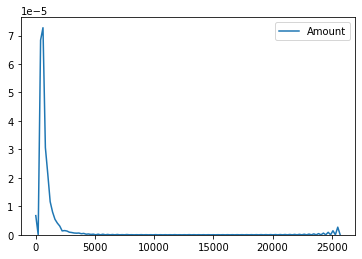

In [15]:
# Distribution of our dataset in Amount of transaction

sns.kdeplot(df['Amount'])
plt.show()

In [16]:
# Our Vi columns are already scaled that's why we only scaled the columns 'Amount' and 'Time'
# After this we must remove the old columns and replace them with the new, making a new dataset with the right values

from sklearn.preprocessing import StandardScaler

stc = StandardScaler()

df['scaled_amount'] = stc.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = stc.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount' , 'Time'] , axis = 1 , inplace = True )

scaled_amount = df['scaled_amount']
scaled_time   = df['scaled_time']

df.drop(['scaled_amount' , 'scaled_time'] , axis = 1 , inplace = True )

df.insert(0 , 'scaled_amount' , scaled_amount)
df.insert(1 , 'scaled_time' , scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Now, we will produce a sub-sample from the previous dataset which will contain randomly 492 valid transactions 
and 492 fraud transactions.
We must do this because in the beginning of this notebook we saw that the original dataframe was heavily imbalanced.
By doing this we help our algorithms better understand patterns that determines whether a transaction is a fraud or not 
which is our target.

In [17]:
df = df.sample(frac=1)

# We take all the fraud transactions from the original dataset
fraud_df =  df[df['Class'] ==1]
# We just want to take 492 random choices of valid transactions, in order to create the new dataframe
valid_df = df.loc[np.random.choice(df.index, 492, replace=False)]
# We join them
normal_distributed_df = pd.concat([fraud_df, valid_df],axis=0)

# We shuffle the new dataframe and make it normal distributed
new_df = normal_distributed_df.sample(frac=1, random_state=42)


new_df = pd.DataFrame(new_df)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
199510,-0.197424,0.804058,-1.015343,-0.427273,0.147467,0.659490,1.518246,0.317151,0.248430,-0.998902,...,-0.651375,0.900469,1.125088,0.246603,0.143374,0.165273,-0.368515,0.098596,-0.144251,0
55401,-0.349231,-1.008440,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,...,-0.042515,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1
213839,-0.345513,0.939292,-0.060839,0.841202,0.563305,0.741463,0.647489,-0.501032,0.885472,-0.134918,...,-0.175881,0.246774,0.989414,-0.219465,-0.061787,-0.414865,-0.513713,0.260008,0.224212,0
16415,-0.259834,-1.411510,0.288029,0.965681,-1.459495,1.921863,-1.912414,-1.130282,-2.814263,0.648663,...,0.330917,0.603127,0.380690,-0.064125,0.271380,0.337220,0.626156,0.565125,0.305925,1
151807,-0.218934,0.031106,-3.552173,5.426461,-3.731810,6.679062,-2.187543,2.433940,-8.748110,-12.108284,...,3.792667,-5.688990,2.510980,0.953933,-0.542506,-0.620152,0.406013,0.023025,0.164741,1


In [18]:
# Our new dataset which contains 984 transactions in random order (492 valid and 492 fraud)
# 492 + 492 = 984, so the shape of the new_df is correct

new_df.shape

(984, 31)

Distribution of the Classes in the new dataset




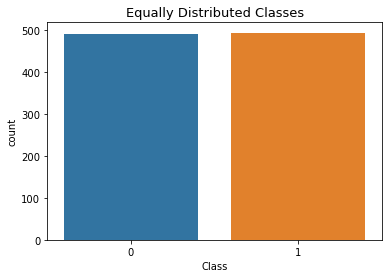

In [19]:
# We present the new dataset of the equally possible transactions

print('Distribution of the Classes in the new dataset')

sns.countplot('Class', data=new_df)
sns.color_palette("Set2", 2)
print('\n')
plt.title('Equally Distributed Classes',fontsize=13)
plt.show()

In [20]:
# We show the ratio of the new dataframe
# Our data are equally likely as we can see below

print("The percentage of normal transactions is: ", (len(new_df[new_df['Class']==0])/len(new_df)))
print("The percentage of fraud transactions is: ", (len(new_df[new_df['Class']==1])/len(new_df)))
print("The total number of transactions in resampled data: ", len(new_df))

The percentage of normal transactions is:  0.49898373983739835
The percentage of fraud transactions is:  0.5010162601626016
The total number of transactions in resampled data:  984


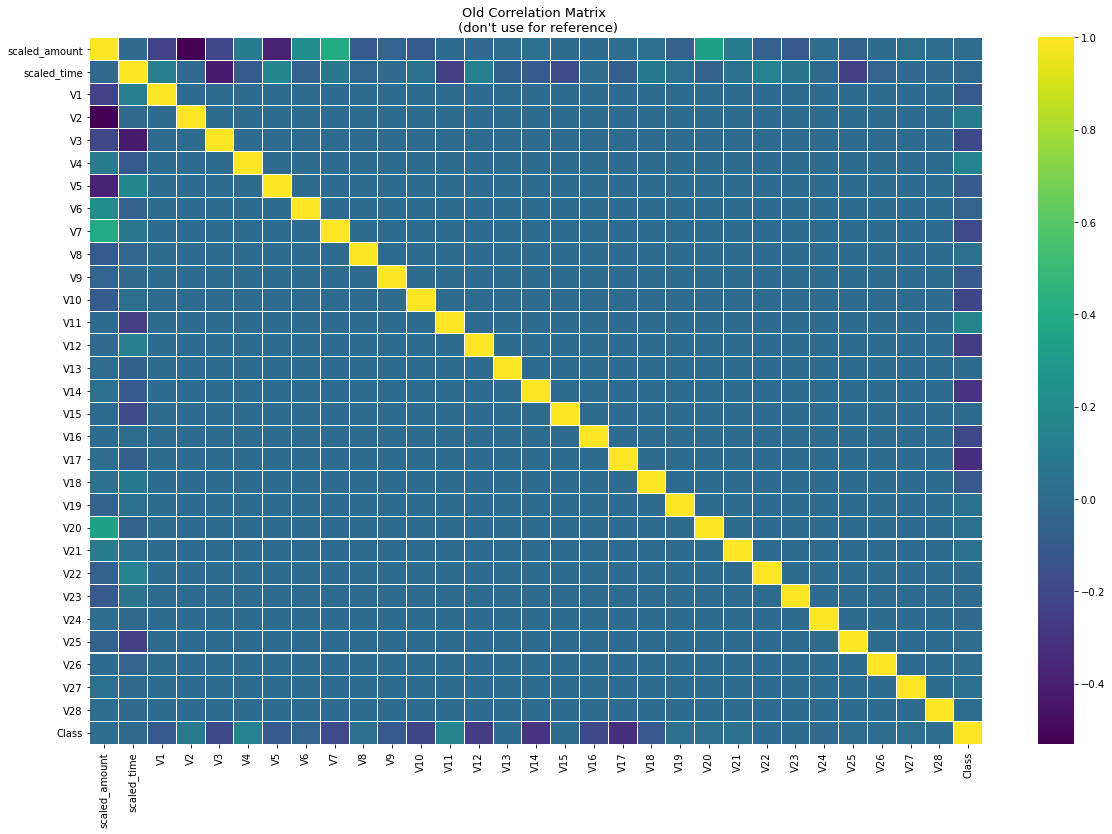

In [21]:
# We will not use this heatmap as a reference. We just use it as observation

corr = df.corr()
fig, ax = plt.subplots(figsize=(20,13))
sns.heatmap(corr, cmap='viridis', annot_kws={'size':20},linewidths= 0.05)
ax.set_title("Old Correlation Matrix \n (don't use for reference)", fontsize=13)
plt.show()

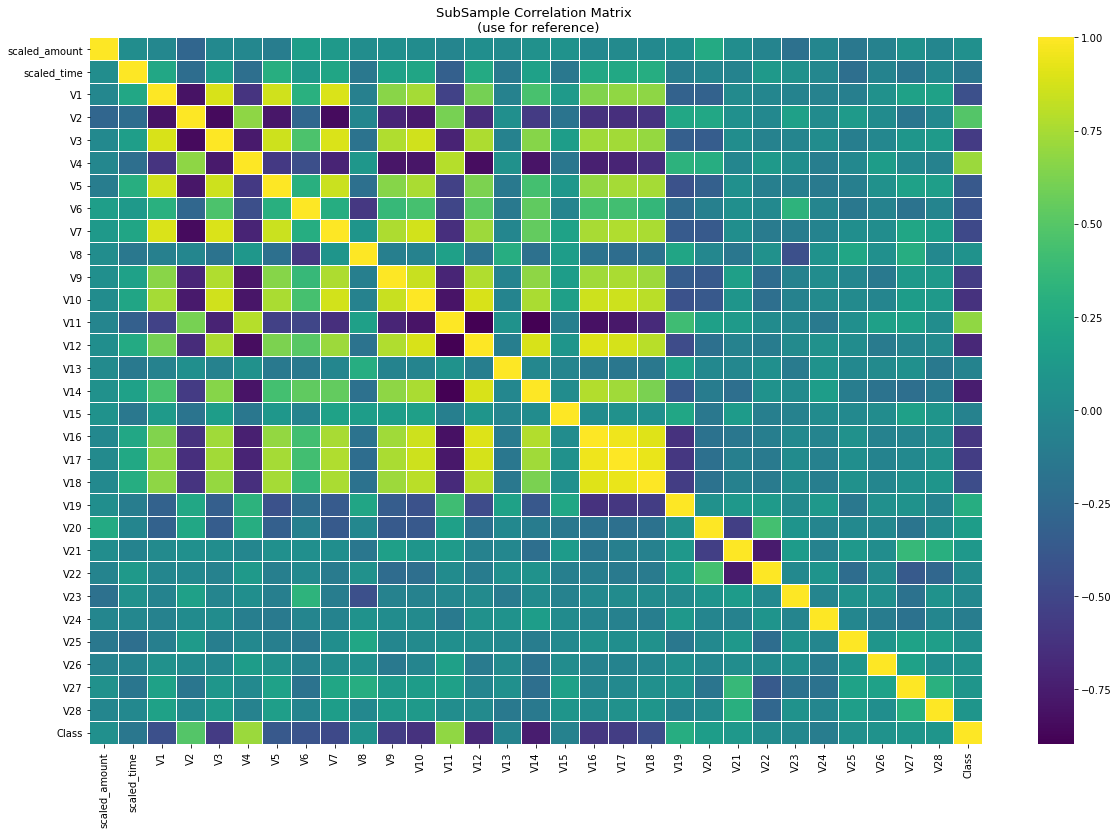

In [22]:
# This is the heatmap that we will use as a reference in the project

corr1 = new_df.corr()
fig, ax = plt.subplots(figsize=(20,13))
sns.heatmap(corr1, cmap='viridis', annot_kws={'size':20}, linewidths= 0.05)
ax.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=13)
plt.show()

                                                                                      IQR METHOD 

Positive Correlation Boxtplos 



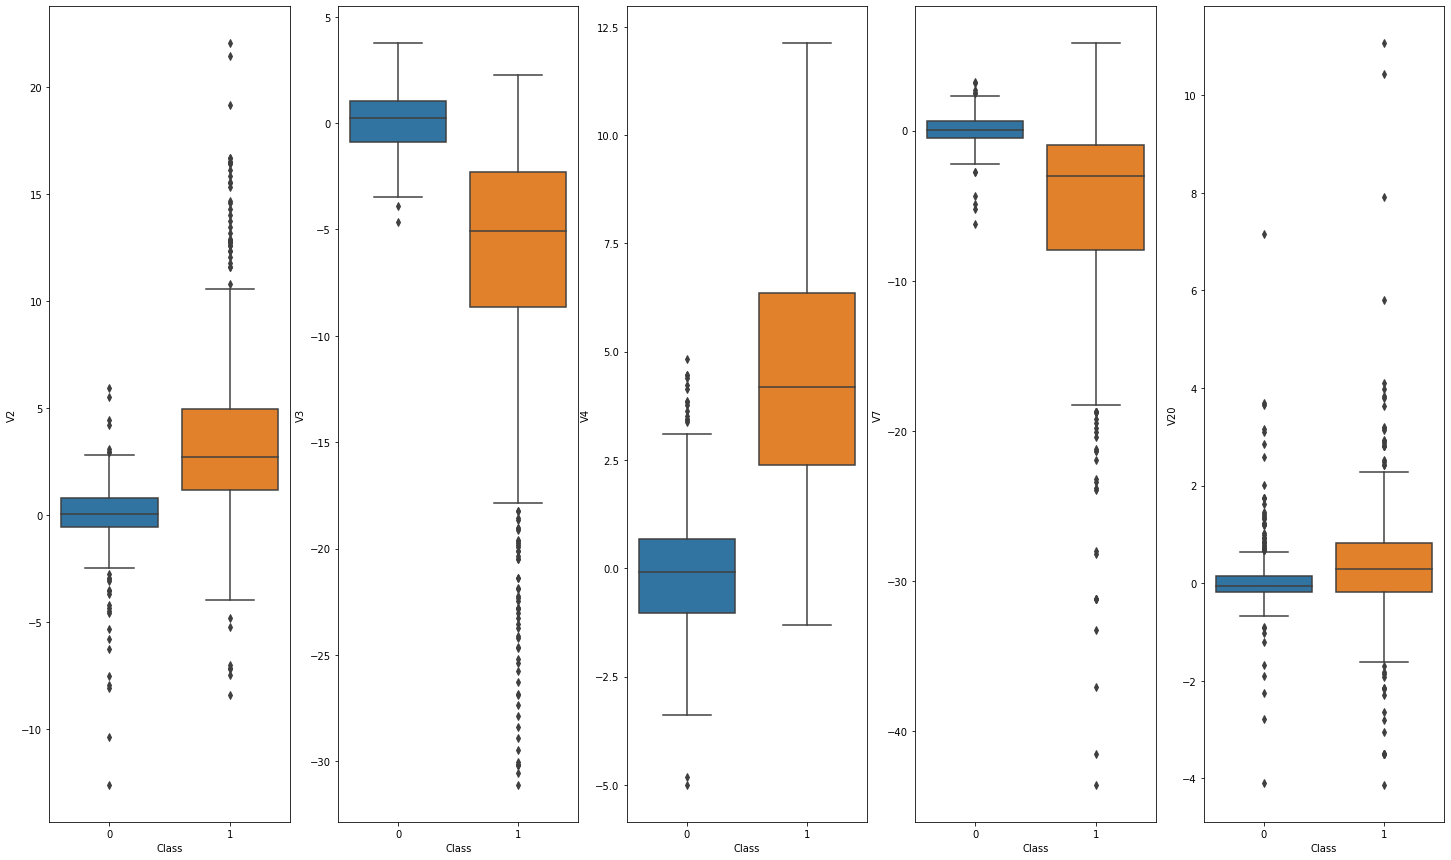

In [23]:
# Find the positive correletaion which can be our outliers
# Positive correlation: The higher the feature value the probability increases that it will be a fraudulent transaction

f, axes = plt.subplots(ncols=5, figsize=(25,15))

sns.boxplot(x='Class' , y ='V2',  data = new_df, ax=axes[0])
sns.boxplot(x='Class' , y ='V3',  data = new_df, ax=axes[1])
sns.boxplot(x='Class' , y ='V4',  data = new_df, ax=axes[2])
sns.boxplot(x='Class' , y ='V7',  data = new_df, ax=axes[3])
sns.boxplot(x='Class' , y ='V20', data = new_df, ax=axes[4])

print('Positive Correlation Boxtplos', '\n')
plt.show()

In [24]:
# We will remove of the extreme outliers from top two positive correlation
# First is the V20

V20_fraud = new_df['V20'].loc[new_df['Class'] == 1 ].values

q25_V20 = np.percentile(V20_fraud , 25)
q75_V20 = np.percentile(V20_fraud , 75)

print('The 25th Quartile is :' , q25_V20)
print('The 75th Quantile is :' , q75_V20)

V20_iqr = q75_V20 - q25_V20

print('The IQR of V20 is :' , V20_iqr , '\n')

V20_off = 1.5 * V20_iqr
V20_lower = q25_V20 - V20_off
V20_upper = q75_V20 + V20_off

print('The V20 that we will remove is :' , V20_off)
print('The min point is :' , V20_lower)
print('The max point is :' , V20_upper , '\n')

outliers_V20 = [i for i in V20_fraud if i < V20_lower or i > V20_upper ]
new_df_V20 = new_df.drop(new_df[(new_df['V20'] > V20_upper) | (new_df['V20'] < V20_lower)].index)

print('The number of the outliers is : ', len(outliers_V20))
print('The number of transactions after the outliers removes is :' , len(new_df_V20))
print('The new dataset after we remove the outliers of v20 is :' , new_df_V20.shape)

The 25th Quartile is : -0.17160787864795998
The 75th Quantile is : 0.8214045486714742
The IQR of V20 is : 0.9930124273194342 

The V20 that we will remove is : 1.4895186409791512
The min point is : -1.6611265196271112
The max point is : 2.3109231896506253 

The number of the outliers is :  41
The number of transactions after the outliers removes is : 931
The new dataset after we remove the outliers of v20 is : (931, 31)


Before and After we apply the IQR method and remove the outliers of V20 



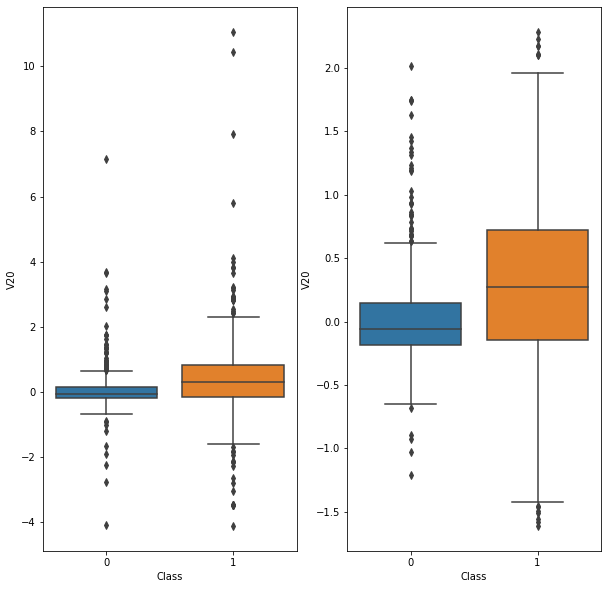

In [25]:
# We can compare our boxplots before and after we remove the outliers of V20. 

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

sns.boxplot( x="Class", y="V20", data=new_df, ax=ax1 )
sns.boxplot( x="Class", y="V20", data=new_df_V20, ax=ax2 )

print('Before and After we apply the IQR method and remove the outliers of V20', '\n')

In [26]:
# We will remove of the extreme outliers from top two positive correlation
# Second is the V3

V3_fraud = new_df['V3'].loc[new_df['Class'] == 1 ].values

q25_V3 = np.percentile(V3_fraud , 25)
q75_V3 = np.percentile(V3_fraud , 75)

print('The 25th Quartile is :'  , q25_V3)
print('The 75th Quantile is : ' , q75_V3)

V3_iqr = q75_V3 - q25_V3

print('The IQR of V3 is :' , V3_iqr , '\n')
V3_off = 1.5 * V3_iqr
V3_lower = q25_V3 - V3_off
V3_upper = q75_V3 + V3_off

print('The V3 tha we will remove is :' , V3_off)
print('The min point is :' , V3_lower)
print('The max point is :' , V3_upper ,'\n')

outliers_V3 = [i for i in V3_fraud if i < V3_lower or i > V3_upper ]
new_df_V3 = new_df.drop(new_df[(new_df['V3'] > V3_upper) | (new_df['V3'] < V3_lower)].index)

print('The number of the outliers is : ', len(outliers_V3))
print('The number of transactions after the outliers removes is :' , len(new_df_V3))
print('The new dataset after we remove the outliers of V3 is :' , new_df_V3.shape)

The 25th Quartile is : -8.63180221299529
The 75th Quantile is :  -2.27692070362638
The IQR of V3 is : 6.3548815093689095 

The V3 tha we will remove is : 9.532322264053365
The min point is : -18.164124477048652
The max point is : 7.255401560426985 

The number of the outliers is :  53
The number of transactions after the outliers removes is : 931
The new dataset after we remove the outliers of V3 is : (931, 31)


Before and After we apply the IQR method and remove the outliers of V3 



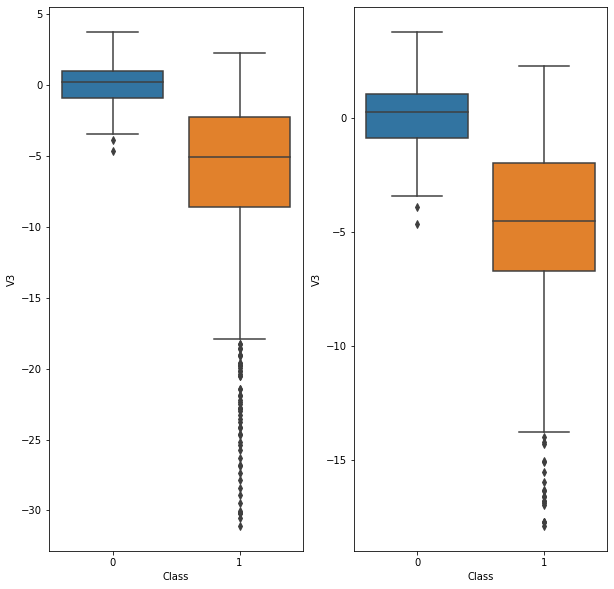

In [27]:
# We can compare our boxplots before and after we remove the outliers of V3 

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

sns.boxplot(x="Class", y="V3", data=new_df, ax=ax1)
sns.boxplot(x="Class", y="V3", data=new_df_V3, ax=ax2)

print('Before and After we apply the IQR method and remove the outliers of V3' , '\n')

Negative Correlation Boxtplos 



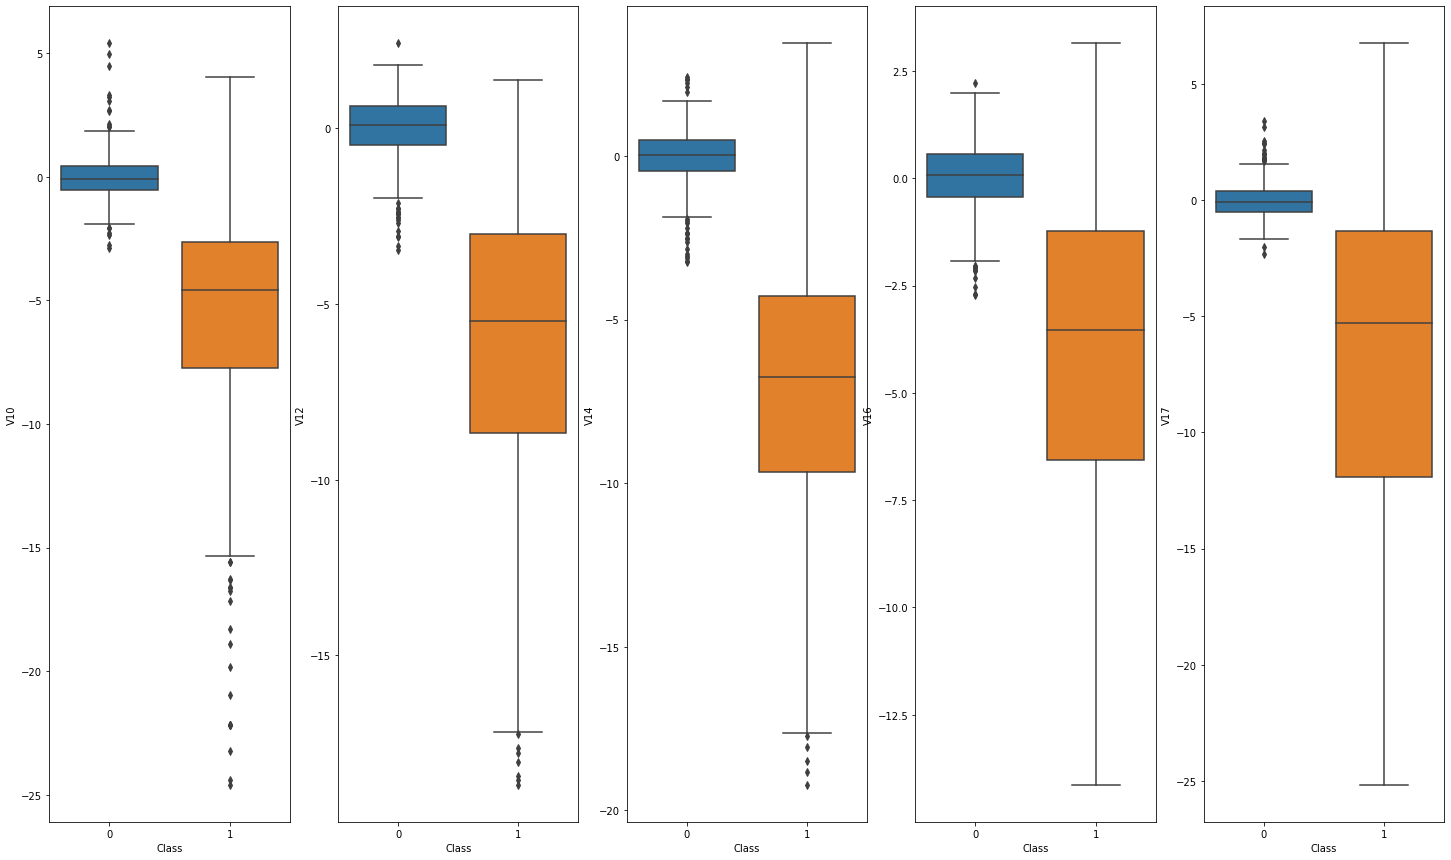

In [28]:
# Negative correlation: The lower the feature value,the probability decreases that it will be a fraudulent transaction.

f, axes = plt.subplots(ncols=5, figsize=(25,15))

sns.boxplot( x='Class' , y ='V10', data = new_df, ax=axes[0] )
sns.boxplot( x='Class' , y ='V12', data = new_df, ax=axes[1] )
sns.boxplot( x='Class' , y ='V14', data = new_df, ax=axes[2] )
sns.boxplot( x='Class' , y ='V16', data = new_df, ax=axes[3] )
sns.boxplot( x='Class' , y ='V17', data = new_df, ax=axes[4] )

print('Negative Correlation Boxtplos' , '\n')
plt.show()

In [29]:
# We will remove of the extreme outliers from top two negative correlation
# First the V10

V10_fraud = new_df['V10'].loc[new_df['Class'] == 1 ].values

q25_V10 = np.percentile(V10_fraud , 25)
q75_V10 = np.percentile(V10_fraud , 75)

print('The 25th Quartile is :' , q25_V10)
print('The 75th Quantile is :' , q75_V10)

V10_iqr = q75_V10 - q25_V10

print('The IQR of V10 is :' , V10_iqr , '\n')

V10_off = 1.5* V10_iqr
V10_lower = q25_V10 - V10_off
V10_upper = q75_V10 + V10_off

print('The V10 tha we will remove is :' , V10_off)
print('The min point is :' , V10_lower)
print('The max point is :' , V10_upper , '\n')

outliers_V10 = [i for i in V10_fraud if i < V10_lower or i > V10_upper ]
new_df_V10 = new_df.drop(new_df[(new_df['V10'] > V10_upper) | (new_df['V10'] < V10_lower)].index)

print('The number of the outliers is : ', len(outliers_V10))
print('The number of transactions after the outliers removes is :' , len(new_df_V10))
print('The new dataset after we remove the outliers of V10 is :' ,new_df_V10.shape)

The 25th Quartile is : -7.748480049505821
The 75th Quantile is : -2.63744174460075
The IQR of V10 is : 5.111038304905071 

The V10 tha we will remove is : 7.666557457357606
The min point is : -15.415037506863428
The max point is : 5.029115712756856 

The number of the outliers is :  19
The number of transactions after the outliers removes is : 964
The new dataset after we remove the outliers of V10 is : (964, 31)


Before and After we apply the IQR method and remove the outliers of V10 



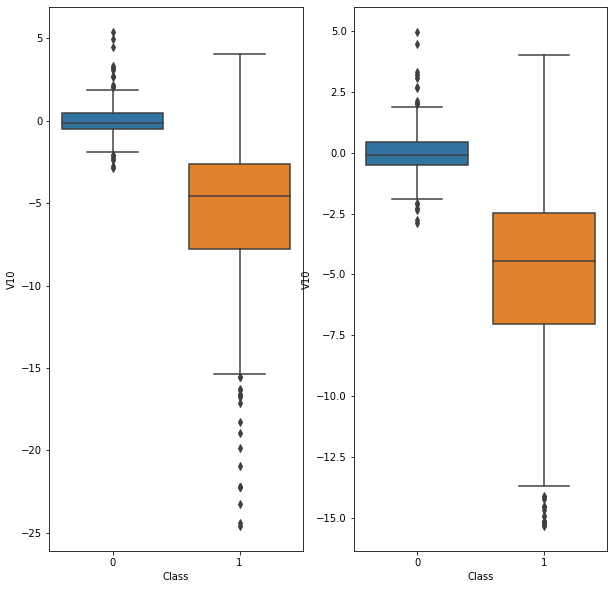

In [30]:
# We can compare our boxplots before and after we remove the outliers of V10

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

sns.boxplot( x="Class", y="V10", data=new_df, ax = ax1 )
sns.boxplot( x="Class", y="V10", data=new_df_V10, ax = ax2 )

print('Before and After we apply the IQR method and remove the outliers of V10' , '\n')

In [31]:
# We will remove of the extreme outliers from top two negative correlation
# First the V14

V14_fraud = new_df['V14'].loc[new_df['Class'] == 1 ].values

q25_V14 = np.percentile(V14_fraud , 25)
q75_V14 = np.percentile(V14_fraud , 75)

print('The 25th Quartile is :' , q25_V14)
print('The 75th Quantile is : ' , q75_V14)

V14_iqr = q75_V14 - q25_V14

print('The IQR of V14 is :' , V14_iqr, '\n')

V14_off = 1.5 * V14_iqr
V14_lower = q25_V14 - V14_off
V14_upper = q75_V14 + V14_off

print('The V14 tha we will remove is :' , V14_off)
print('The min point is :' , V14_lower)
print('The max point is :' , V14_upper,'\n')

outliers_V14 = [i for i in V14_fraud if i < V14_lower or i > V14_upper ]
new_df_V14 = new_df.drop(new_df[(new_df['V14'] > V14_upper) | (new_df['V14'] < V14_lower)].index)

print('The number of the outliers is : ', len(outliers_V14))
print('The number of transactions after the outliers removes is :' , len(new_df_V14))
print('The new dataset after we remove the outliers of V14 is :' ,new_df_V14.shape)

The 25th Quartile is : -9.6576265944335
The 75th Quantile is :  -4.28799577702192
The IQR of V14 is : 5.36963081741158 

The V14 tha we will remove is : 8.05444622611737
The min point is : -17.712072820550873
The max point is : 3.7664504490954505 

The number of the outliers is :  5
The number of transactions after the outliers removes is : 979
The new dataset after we remove the outliers of V14 is : (979, 31)


Before and After we apply the IQR method and remove the outliers of V14 



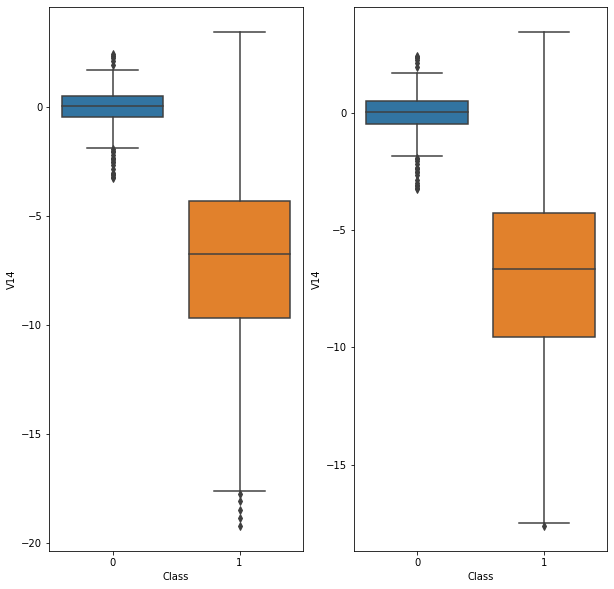

In [32]:
# We can compare our boxplots before and after we remove the outliers of V14

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

sns.boxplot( x="Class", y="V14", data=new_df, ax=ax1)
sns.boxplot( x="Class", y="V14", data=new_df_V14, ax=ax2)

print('Before and After we apply the IQR method and remove the outliers of V14' , '\n' )

In [33]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [34]:
# Spliting the dataset in train set and test set, using sklearn libraly

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42 )

In [35]:
from sklearn.metrics import (confusion_matrix, roc_curve, classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score)

The errors of the Isolation Forest model is  707 

Model Accuracy: 1.0
Model Precision: 0.37
Model Recall: 0.31
Model F1-Score: 0.34
Model ROC: 0.66 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284230
           1       0.37      0.31      0.34       577

    accuracy                           1.00    284807
   macro avg       0.68      0.66      0.67    284807
weighted avg       1.00      1.00      1.00    284807
 



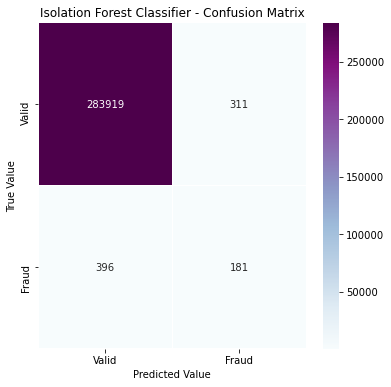

In [36]:
# ISOLATION FOREST TREE MODEL

from sklearn.ensemble import IsolationForest

isf = IsolationForest(random_state = 42, max_samples = len(X)).fit(X)    # Fitting the model
y_prediction = isf.predict(X)                                            # Prediction using trained model

# The isolation forest use (-1,1) in order to predict the result
# But we have valid = 0 and fraud = 1 , so we must make some changes  before we run it

y_prediction[y_prediction ==  1] = 0                                    # Valid transactions are labelled as 0, but we change it to valid = 1 
y_prediction[y_prediction == -1] = 1                                    # Fraudulent transactions are labelled as 1, but we change it to fraud = -1

errors = (y_prediction != y).sum()                                      # Total number of errors is calculated

print('The errors of the Isolation Forest model is ', errors , '\n')

print("Model Accuracy:", round(accuracy_score(y_prediction , y),2))
print("Model Precision:", round(precision_score(y_prediction , y),2))
print("Model Recall:", round(recall_score(y_prediction , y),2))
print("Model F1-Score:", round(f1_score(y_prediction , y),2))
print("Model ROC:", round(roc_auc_score(y_prediction , y),2) , '\n')


conf_matrix=confusion_matrix(y_prediction,y)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(6, 6)) 

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels, 
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_prediction , y) , '\n')

plt.title("Isolation Forest Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

Model Accuracy: 1.0
Model Precision: 0.97
Model Recall: 0.76
Model F1-Score: 0.85
Model ROC: 0.88 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56867
       Fraud       0.97      0.76      0.85        95

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962
 



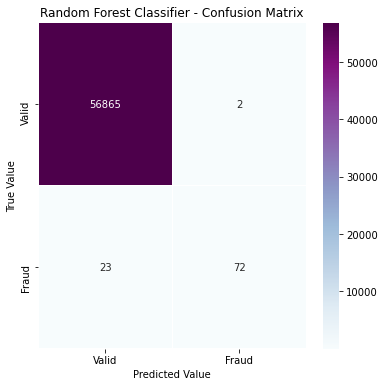

In [37]:
# RANDOM FOREST CLASSIFIER MODEL 

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier( random_state = 42 ) 
rfc.fit(X_train, y_train) 
Y_pred=rfc.predict(X_test) 

print("Model Accuracy:", round(accuracy_score(y_test, Y_pred),2))
print("Model Precision:", round(precision_score(y_test, Y_pred),2))
print("Model Recall:", round(recall_score(y_test, Y_pred),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred),2))
print("Model ROC:", round(roc_auc_score(y_test, Y_pred),2) , '\n')

conf_matrix=confusion_matrix(y_test, Y_pred) 
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(6, 6)) 

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels, 
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_test, Y_pred, target_names=labels) , '\n')

plt.title("Random Forest Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

Model Accuracy: 1.0
Model Precision: 0.87
Model Recall: 0.64
Model F1-Score: 0.74 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56867
       Fraud       0.87      0.64      0.74        95

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962
 



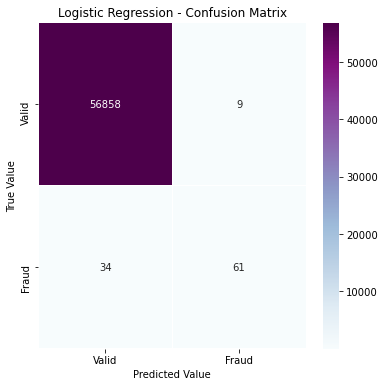

In [38]:
# LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)
Y_pred1 = logreg.predict(X_test)

print("Model Accuracy:", round(accuracy_score(y_test, Y_pred1),2))
print("Model Precision:", round(precision_score(y_test, Y_pred1),2))
print("Model Recall:", round(recall_score(y_test, Y_pred1),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred1),2) , '\n')


conf_matrix1 = confusion_matrix(y_test, Y_pred1)
plt.figure(figsize=(6, 6)) 
labels= ['Valid', 'Fraud'] 

sns.heatmap(pd.DataFrame(conf_matrix1),annot=True, fmt='d',
            linewidths= 0.05 ,cmap='BuPu',xticklabels= labels, yticklabels= labels)

print(classification_report(y_test, Y_pred1, target_names=labels) , '\n')

plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Model Accuracy: 1.0
Model Precision: 0.73
Model Recall: 0.76
Model F1-Score: 0.74 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56867
       Fraud       0.73      0.76      0.74        95

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962
 



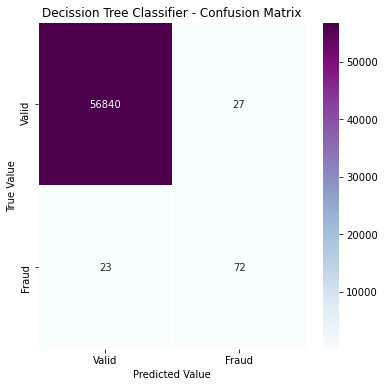

In [39]:
# DECISSION TREE CLASSIFIER MODEL

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train,y_train)
Y_pred2 = dtc.predict(X_test)
conf_matrix2 = confusion_matrix(y_test , Y_pred2)

print("Model Accuracy:", round(accuracy_score(y_test, Y_pred2),2))
print("Model Precision:", round(precision_score(y_test, Y_pred2),2))
print("Model Recall:", round(recall_score(y_test, Y_pred2),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred2),2) , '\n')

conf_matrix2 = confusion_matrix(y_test, Y_pred2)
plt.figure(figsize=(6, 6))
labels= ['Valid', 'Fraud'] 

sns.heatmap(pd.DataFrame(conf_matrix2),annot=True, fmt='d',linewidths= 0.05 ,cmap='BuPu',
            xticklabels= labels, yticklabels= labels)

print(classification_report(y_test,Y_pred2,target_names=labels) , '\n')

plt.title('Decission Tree Classifier - Confusion Matrix')
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

Model Accuracy: 1.0
Model Precision: 0.85
Model Recall: 0.65
Model F1-Score: 0.74 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56867
       Fraud       0.73      0.76      0.74        95

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962
 



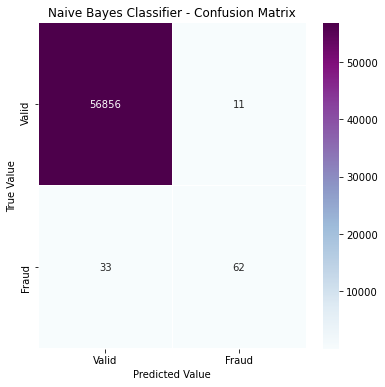

In [40]:
# NAIVE BAYES CLASSIFIER

from sklearn.naive_bayes import BernoulliNB

NB = BernoulliNB()
NB.fit(X_train,y_train)
Y_pred3 = NB.predict(X_test)
conf_matrix_nb = confusion_matrix(y_test , Y_pred3)

print("Model Accuracy:", round(accuracy_score(y_test, Y_pred3),2))
print("Model Precision:", round(precision_score(y_test, Y_pred3),2))
print("Model Recall:", round(recall_score(y_test, Y_pred3),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred3),2) , '\n')

conf_matrix2 = confusion_matrix(y_test, Y_pred3)
plt.figure(figsize=(6, 6))
labels= ['Valid', 'Fraud'] 

sns.heatmap(pd.DataFrame(conf_matrix2),annot=True, fmt='d',linewidths= 0.05 ,cmap='BuPu',
            xticklabels= labels, yticklabels= labels)

print(classification_report(y_test,Y_pred2,target_names=labels) , '\n')

plt.title('Naive Bayes Classifier - Confusion Matrix')
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [ ]:
# SVM CLASSIFIER MODEL
# SVM = Support Vector Machine

from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train,y_train)

Y_pred4 = svc_clf.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test,Y_pred4)

print("Model Accuracy:", round(accuracy_score(y_test, Y_pred4),2))
print("Model Precision:", round(precision_score(y_test, Y_pred4),2))
print("Model Recall:", round(recall_score(y_test,Y_pred4),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred4),2) , '\n')

plt.figure(figsize=(6, 6))
labels= ['Valid', 'Fraud'] 

sns.heatmap(pd.DataFrame(conf_matrix2),annot=True, fmt='d',linewidths= 0.05 ,cmap='BuPu',
            xticklabels= labels, yticklabels= labels)

print(classification_report(y_test,Y_pred2,target_names=labels) , '\n')

plt.title('SVM Classifier - Confusion Matrix')
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()